In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This notebook compares observed water discharge and SSC data with HydroTrend outputs. There are 4 parts:

**Part 1: Import observed data and generate rating curve**
- Data was collected from April 2019-January 2020
    - Discharge data was collected via boat and ADCP
    - SSC was calculated from water bottle samples, averaged across 3 locations along a transect
- Data are plotted as Water Discharge vs. SSC
- A rating curve is generated using a power law function

**Part 2: Generate average sediment load in MT over observation time period**
- use new rating curve to generate total Qs over observation time period
    
**Part 3: Rating curve-generated Annual Qs from HT outputs**
- The new rating curve is used to generate annual Qs from HydroTrend Qw outputs
- The previously established rating curve is used to generate annual Qs from HydroTrend Qw outputs

**Part 4: Compare new rating curve Qs with established curve Qs**
- Compare Annual Qs results from the new rating curve and previously established rating curve 

## Part 1: Import observed data and generate rating curve

In [2]:
# data from IWM 
data_obs = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/sediment_calibration/sed_data/Ganges_q_ssc.txt', delimiter = '\t'))
data_obs['Date'] = pd.to_datetime(data_obs['Date'], format="%m/%d/%y")
data_obs

,Date,Discharge (m3/S),Water Level mPWD,SSC (mg/l)
0,2019-04-13,1357.40,5.24,22.82
1,2019-04-29,1520.14,5.25,37.78
2,2019-05-23,1755.34,6.58,43.10
3,2019-06-11,1409.00,5.70,9.80
4,2019-07-01,3002.96,7.63,31.02
5,2019-07-15,10061.00,10.28,596.38
6,2019-08-03,17674.29,11.86,527.21
7,2019-08-17,21470.65,11.77,491.09
8,2019-09-07,26552.03,12.23,794.17
9,2019-09-24,41809.50,13.74,1229.08


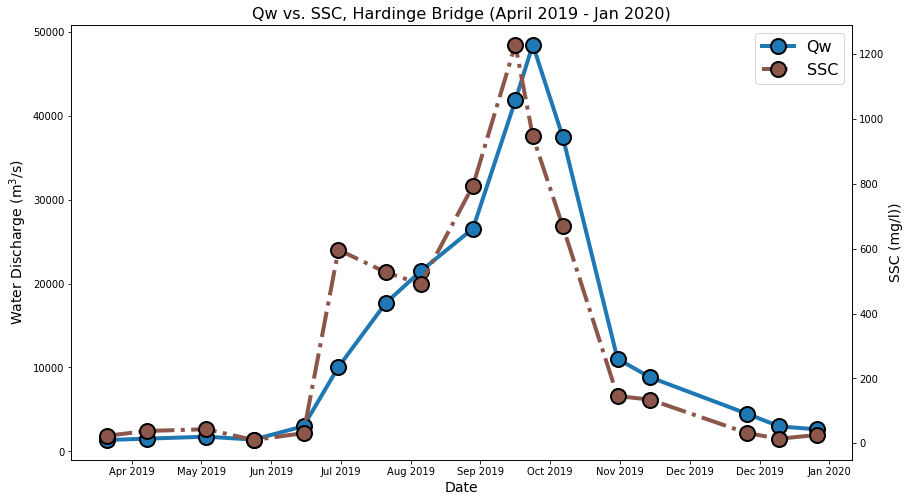

In [3]:
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from matplotlib import rc
rc('mathtext', default = 'regular')

fig = plt.figure(figsize = (14, 8))
ax = fig.add_subplot()

lns1 = ax.plot(data_obs['Date'], data_obs['Discharge (m3/S)'],
         '-o', color='tab:blue', markersize=15, 
         linewidth=4,markerfacecolor='tab:blue', 
         markeredgecolor='k', markeredgewidth=2,
        label = 'Qw')

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=4))
ax2.xaxis.set_major_formatter(DateFormatter("%b %Y"))

lns2 = ax2.plot(data_obs['Date'], data_obs['SSC (mg/l)'],  
         '-.o', color='tab:brown', markersize=15, linewidth=4,
         markerfacecolor='tab:brown', markeredgecolor='k', markeredgewidth=2,
        label = 'SSC')

lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 0, fontsize=16)

#ax.grid()
ax.set_xlabel('Date', size = 14)
ax.set_ylabel('Water Discharge (m$^3/$s)', size = 14)
ax2.set_ylabel('SSC (mg/l))', size = 14)
plt.title('Qw vs. SSC, Hardinge Bridge (April 2019 - Jan 2020)', size = 16)
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/sed_cal/q_ssc_GR.png')

In [4]:
# calculate new rating curve with observed data, converting concentration to a flux

from scipy.optimize import curve_fit
from scipy import stats

x = data_obs['Discharge (m3/S)']
y = data_obs['SSC (mg/l)']*data_obs['Discharge (m3/S)']*1e-6/1e-3

new_curve = slope, intercept, rvalue, pvalue, std_err = stats.linregress(np.log(x), np.log(y))
print('new curve: slope: {:.3}    intercept: {:.3}    r-squared: {:.3}'.format(new_curve.slope, np.exp(new_curve.intercept), new_curve.rvalue**2))

new curve: slope: 2.23    intercept: 2.09e-06    r-squared: 0.96


In [5]:
# import hydrotrend data
gfdl_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)

gfdl_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [6]:
# calculate new rating curve stats from HT outputs

gfdl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw[1:]), np.log(gfdl_qs[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl.slope, np.exp(gfdl.intercept), gfdl.rvalue**2))

hadgem = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw[1:]), np.log(hadgem_qs[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem.slope, np.exp(hadgem.intercept), hadgem.rvalue**2))

ipsl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw[1:]), np.log(ipsl_qs[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl.slope, np.exp(ipsl.intercept), ipsl.rvalue**2))

miroc = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw[1:]), np.log(miroc_qs[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc.slope, np.exp(miroc.intercept), miroc.rvalue**2))

noresm = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw[1:]), np.log(noresm_qs[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm.slope, np.exp(noresm.intercept), noresm.rvalue**2))

gfdl: slope:2.65    intercept: 2.28e-08    r-squared: 0.95
hadgem: slope:2.63    intercept: 9.97e-09    r-squared: 0.94
ipsl: slope:2.62    intercept: 3.55e-09    r-squared: 0.93
miroc: slope:2.62    intercept: 4.15e-08    r-squared: 0.95
noresm: slope:2.63    intercept: 2.98e-08    r-squared: 0.95


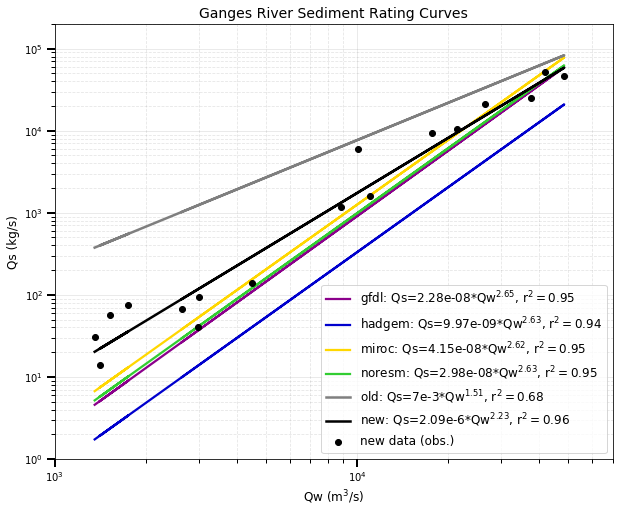

In [7]:
y_new = 2.09e-6*x**2.23         # new curve, obs data
y_old = 7e-3*x**1.51            # old curve
y_gfdl = 2.28e-08*x**2.65        # gfdl curve
y_hadgem = 9.97e-09*x**2.63      # hadgem curve
y_ipsl = 3.55e-09*x**2.62        # ipsl curve
y_miroc = 4.15e-08*x**2.62        # miroc curve
y_noresm = 2.98e-08*x**2.63       # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=2.28e-08*Qw$^{2.65}$, $r^2=0.95$', color='darkmagenta', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=9.97e-09*Qw$^{2.63}$, $r^2=0.94$', color = 'mediumblue', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=3.55e-09*Qw$^{2.62}$, $r^2=0.93$', color = 'mediumturquoise', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=4.15e-08*Qw$^{2.62}$, $r^2=0.95$', color = 'gold', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=2.98e-08*Qw$^{2.63}$, $r^2=0.95$', color = 'limegreen', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=7e-3*Qw$^{1.51}$, $r^2=0.68$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=2.09e-6*Qw$^{2.23}$, $r^2=0.96$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs.)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10e2, 7e4)
ax.set_ylim(1e0, 2e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)
plt.title('Ganges River Sediment Rating Curves', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/sed_cal/rating_curve_GR.png', size = 300)

In [8]:
# import hydrotrend data (from 2019-2020)
gfdl_qw_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)

gfdl_qs_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_4p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp4p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [9]:
gfdl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)

gfdl_qs_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [10]:
# clip to two years of data (2019-2020), rcp4p5
gfdl_qw_4p5_clip = np.array(gfdl_qw_4p5[4745:5475])
hadgem_qw_4p5_clip = np.array(hadgem_qw_4p5[4745:5475])
ipsl_qw_4p5_clip = np.array(ipsl_qw_4p5[4745:5475])
miroc_qw_4p5_clip = np.array(miroc_qw_4p5[4745:5475])
noresm_qw_4p5_clip = np.array(noresm_qw_4p5[4745:5475])

gfdl_qs_4p5_clip = np.array(gfdl_qs_4p5[4745:5475])
hadgem_qs_4p5_clip = np.array(hadgem_qs_4p5[4745:5475])
ipsl_qs_4p5_clip = np.array(ipsl_qs_4p5[4745:5475])
miroc_qs_4p5_clip = np.array(miroc_qs_4p5[4745:5475])
noresm_qs_4p5_clip = np.array(noresm_qs_4p5[4745:5475])

In [11]:
# clip to two years of data (2019-2020), rcp8p5
gfdl_qw_8p5_clip = np.array(gfdl_qw_8p5[4745:5475])
hadgem_qw_8p5_clip = np.array(hadgem_qw_8p5[4745:5475])
ipsl_qw_8p5_clip = np.array(ipsl_qw_8p5[4745:5475])
miroc_qw_8p5_clip = np.array(miroc_qw_8p5[4745:5475])
noresm_qw_8p5_clip = np.array(noresm_qw_8p5[4745:5475])

gfdl_qs_8p5_clip = np.array(gfdl_qs_8p5[4745:5475])
hadgem_qs_8p5_clip = np.array(hadgem_qs_8p5[4745:5475])
ipsl_qs_8p5_clip = np.array(ipsl_qs_8p5[4745:5475])
miroc_qs_8p5_clip = np.array(miroc_qs_8p5[4745:5475])
noresm_qs_8p5_clip = np.array(noresm_qs_8p5[4745:5475])

In [12]:
# calculate new rating curve stats from HT outputs (2019-2020), rcp4p5

gfdl_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw_4p5_clip[1:]), np.log(gfdl_qs_4p5_clip[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl_4p5.slope, np.exp(gfdl_4p5.intercept), gfdl_4p5.rvalue**2))

hadgem_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw_4p5_clip[1:]), np.log(hadgem_qs_4p5_clip[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem_4p5.slope, np.exp(hadgem_4p5.intercept), hadgem_4p5.rvalue**2))

ipsl_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw_4p5_clip[1:]), np.log(ipsl_qs_4p5_clip[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl_4p5.slope, np.exp(ipsl_4p5.intercept), ipsl_4p5.rvalue**2))

miroc_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw_4p5_clip[1:]), np.log(miroc_qs_4p5_clip[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc_4p5.slope, np.exp(miroc_4p5.intercept), miroc_4p5.rvalue**2))

noresm_4p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw_4p5_clip[1:]), np.log(noresm_qs_4p5_clip[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm_4p5.slope, np.exp(noresm_4p5.intercept), noresm_4p5.rvalue**2))

gfdl: slope:2.5    intercept: 9.89e-08    r-squared: 0.96
hadgem: slope:2.46    intercept: 2.98e-08    r-squared: 0.96
ipsl: slope:2.53    intercept: 1.09e-08    r-squared: 0.97
miroc: slope:2.5    intercept: 1.39e-07    r-squared: 0.97
noresm: slope:2.51    intercept: 5.82e-08    r-squared: 0.97


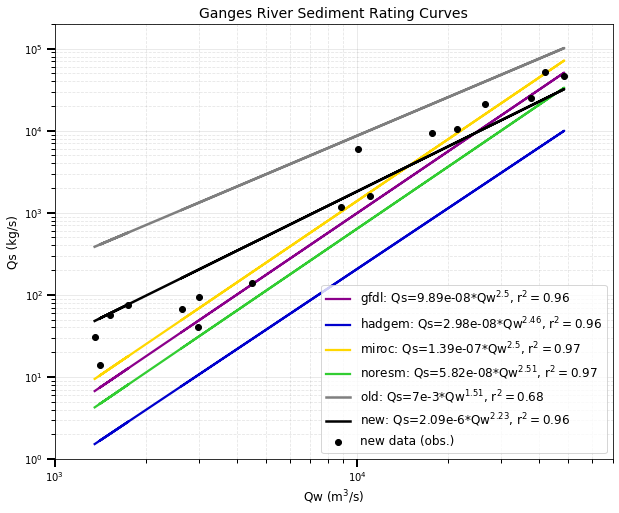

In [13]:
#rcp4p5

y_new = 9.55e-05*x**1.82         # new curve, obs data
y_old = 5e-3*x**1.56            # old curve
y_gfdl = 9.89e-08*x**2.5        # gfdl curve
y_hadgem = 2.98e-08*x**2.46      # hadgem curve
y_ipsl = 1.09e-08*x**2.53        # ipsl curve
y_miroc = 1.39e-07*x**2.5        # miroc curve
y_noresm = 5.82e-08*x**2.51       # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=9.89e-08*Qw$^{2.5}$, $r^2=0.96$', color='darkmagenta', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=2.98e-08*Qw$^{2.46}$, $r^2=0.96$', color = 'mediumblue', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=1.09e-08*Qw$^{2.53}$, $r^2=0.97$', color = 'mediumturquoise', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=1.39e-07*Qw$^{2.5}$, $r^2=0.97$', color = 'gold', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=5.82e-08*Qw$^{2.51}$, $r^2=0.97$', color = 'limegreen', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=7e-3*Qw$^{1.51}$, $r^2=0.68$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=2.09e-6*Qw$^{2.23}$, $r^2=0.96$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs.)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10e2, 7e4)
ax.set_ylim(1e0, 2e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)
plt.title('Ganges River Sediment Rating Curves', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/sed_cal/rating_curve_GR_4p5.png', size = 300)

In [14]:
# calculate new rating curve stats from HT outputs (2019-2020), rcp8p5

gfdl_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw_8p5_clip[1:]), np.log(gfdl_qs_8p5_clip[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl_8p5.slope, np.exp(gfdl_8p5.intercept), gfdl_8p5.rvalue**2))

hadgem_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw_8p5_clip[1:]), np.log(hadgem_qs_8p5_clip[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem_8p5.slope, np.exp(hadgem_8p5.intercept), hadgem_8p5.rvalue**2))

ipsl_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw_8p5_clip[1:]), np.log(ipsl_qs_8p5_clip[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl_8p5.slope, np.exp(ipsl_8p5.intercept), ipsl_8p5.rvalue**2))

miroc_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw_8p5_clip[1:]), np.log(miroc_qs_8p5_clip[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc_8p5.slope, np.exp(miroc_8p5.intercept), miroc_8p5.rvalue**2))

noresm_8p5 = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw_8p5_clip[1:]), np.log(noresm_qs_8p5_clip[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm_8p5.slope, np.exp(noresm_8p5.intercept), noresm_8p5.rvalue**2))

gfdl: slope:2.47    intercept: 1.26e-07    r-squared: 0.97
hadgem: slope:2.54    intercept: 1.49e-08    r-squared: 0.96
ipsl: slope:2.51    intercept: 3.41e-08    r-squared: 0.95
miroc: slope:2.48    intercept: 1.33e-07    r-squared: 0.97
noresm: slope:2.46    intercept: 9.26e-08    r-squared: 0.97


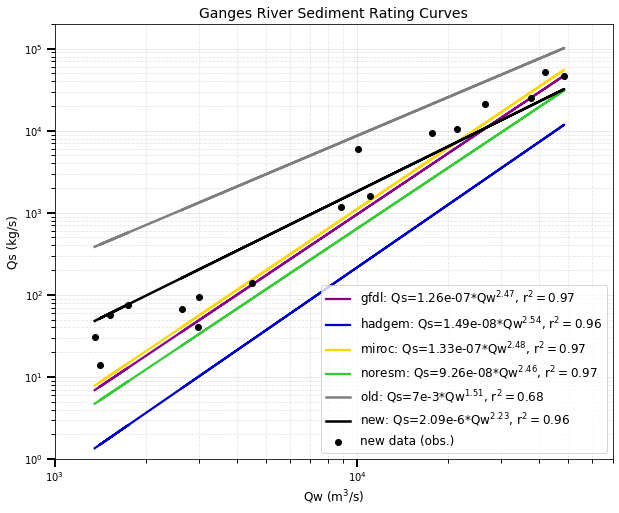

In [15]:
#rcp8p5

y_new = 9.55e-05*x**1.82         # new curve, obs data
y_old = 5e-3*x**1.56            # old curve
y_gfdl = 1.26e-07*x**2.47        # gfdl curve
y_hadgem = 1.49e-08*x**2.54      # hadgem curve
y_ipsl = 3.41e-08*x**2.51        # ipsl curve
y_miroc = 1.33e-07*x**2.48        # miroc curve
y_noresm = 9.26e-08*x**2.46       # noresm curve

fig, ax = plt.subplots(figsize = (10,8))
ax.grid(b=True, which='major', color='grey', linestyle='-', alpha = 0.2)
ax.grid(b=True, which='minor', color='grey', linestyle='--', alpha = 0.2)

plt.plot(x, y_gfdl, label = 'gfdl: Qs=1.26e-07*Qw$^{2.47}$, $r^2=0.97$', color='darkmagenta', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_hadgem, label = 'hadgem: Qs=1.49e-08*Qw$^{2.54}$, $r^2=0.96$', color = 'mediumblue', linestyle = 'solid', linewidth = 2.25, zorder=2)
#plt.plot(x, y_ipsl, label = 'ipsl: Qs=3.41e-08*Qw$^{2.51}$, $r^2=0.95$', color = 'mediumturquoise', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_miroc, label = 'miroc: Qs=1.33e-07*Qw$^{2.48}$, $r^2=0.97$', color = 'gold', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_noresm, label = 'noresm: Qs=9.26e-08*Qw$^{2.46}$, $r^2=0.97$', color = 'limegreen', linestyle = 'solid', linewidth = 2.25, zorder=2)
plt.plot(x, y_old, label = 'old: Qs=7e-3*Qw$^{1.51}$, $r^2=0.68$', color = "tab:gray", linestyle = 'solid', linewidth = 2.5)
plt.plot(x, y_new, label = 'new: Qs=2.09e-6*Qw$^{2.23}$, $r^2=0.96$', color = "k", linestyle = "solid", linewidth = 2.5)
plt.scatter(x, y, label='new data (obs.)', color = "k", zorder=3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(10e2, 7e4)
ax.set_ylim(1e0, 2e5)
ax.set_ylabel('Qs (kg/s)', size = 12)
ax.set_xlabel('Qw (m$^3/$s)', size = 12)
ax.tick_params(which = 'major', width = 2, length = 8)
ax.tick_params(which = 'minor', width = 1, length = 4)
plt.title('Ganges River Sediment Rating Curves', size = 14)
plt.legend(loc = 4, prop={'size': 12})
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v2/sed_cal/rating_curve_GR_8p5.png', size = 300)

## Part 2: Generate average sediment load in MT/yr over rating curve time period

### Part 2.1: Sediment loads from HydroTrend rating curves 

In [16]:
# generate daily Qs using hydrotrend data and hydrotrend curves over 2019-2020 time period
gfdl_qs_2020_ht = 9.89e-08*(gfdl_qw_4p5[4745:5475]**2.5)
hadgem_qs_2020_ht = 2.98e-08*(hadgem_qw_4p5[4745:5475]**2.46)
ipsl_qs_2020_ht = 1.09e-08*(ipsl_qw_4p5[4745:5475]**2.53)
miroc_qs_2020_ht = 1.39e-07*(miroc_qw_4p5[4745:5475]**2.5)
noresm_qs_2020_ht = 5.82e-08*(noresm_qw_4p5[4745:5475]**2.51)

In [17]:
# function to calculate Qs in MT/yr for rating curves:

def annual_load_BT(qs):
    return ((((qs.sum())*3.154e7/1e9))/2/365)

gfdl_qs_annual_btyr_ht = annual_load_BT(gfdl_qs_2020_ht)
hadgem_qs_annual_btyr_ht = annual_load_BT(hadgem_qs_2020_ht)
ipsl_qs_annual_btyr_ht = annual_load_BT(ipsl_qs_2020_ht)
miroc_qs_annual_btyr_ht = annual_load_BT(miroc_qs_2020_ht)
noresm_qs_annual_btyr_ht = annual_load_BT(noresm_qs_2020_ht)

In [18]:
# print Qs for remaining climate models
print('GFDL: Qs in MT/yr: {:.4}'.format(gfdl_qs_annual_btyr_ht))
print('HadGEM: Qs in MT/yr: {:.4}'.format(hadgem_qs_annual_btyr_ht))
#print('IPSL: Qs in BT/yr: {:.4}'.format(ipsl_qs_annual_btyr_ht))
print('MIROC: Qs in MT/yr: {:.4}'.format(miroc_qs_annual_btyr_ht))
print('NORESM: Qs in MT/yr: {:.4}'.format(noresm_qs_annual_btyr_ht))
average_ht = (gfdl_qs_annual_btyr_ht + hadgem_qs_annual_btyr_ht + miroc_qs_annual_btyr_ht + noresm_qs_annual_btyr_ht)/4
print('Average: Qs in MT/yr: {:.4}'.format(average_ht))

GFDL: Qs in MT/yr: 151.6
HadGEM: Qs in MT/yr: 361.4
MIROC: Qs in MT/yr: 377.8
NORESM: Qs in MT/yr: 622.2
Average: Qs in MT/yr: 378.3


### Part 2.2: Sediment load from new rating curve and observed data

In [19]:
# calculate Qs with new rating curve using obs data
obs_avg_2020_new = 2.09e-06*(data_obs['Discharge (m3/S)']**2.23)
obs_qs_annual_btyr_new = ((obs_avg_2020_new.sum()*3.154e7/1e9))/16
print('New (obs): Qs in BT/yr: {:.4}'.format(obs_qs_annual_btyr_new))

New (obs): Qs in BT/yr: 337.2


## Compare rating curve generated sediment loads

In [20]:
data_obs_qw = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/water_data/Ganges/Hardinge_Qw_1976-2006.csv'))
data_obs['Date'] = pd.to_datetime(data_obs['Date'], format="%m/%d/%y")
data_obs_qw


,Date,Discharge (m3/s)
0,1/1/76,2410.0
1,1/2/76,2370.0
2,1/3/76,2320.0
3,1/4/76,2270.0
4,1/5/76,2180.0
...,...,...
10945,12/20/05,2664.0
10946,12/21/05,2596.0
10947,12/22/05,2529.0
10948,12/23/05,2463.0


In [21]:
data_obs_qs = 7e-3*(data_obs_qw['Discharge (m3/s)']**1.51)
data_obs_qs_sum = data_obs_qs.sum()
data_obs_qs_avg_kgs = data_obs_qs_sum/10950
data_obs_qs_avg_mtyr = data_obs_qs_avg_kgs*3.14e7/1e9
data_obs_qs_avg_mtyr

451.8887782578545

In [30]:
gfdl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/GFDL-ESM2M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/HadGEM2/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/IPSL_CM5A/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/MIROC-ESM-CHEM/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw_8p5 = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/rcp8p5/NORESM-M/2020/Hydrotrend/HYDROASCII.Q', skip_header = True)

In [40]:
gfdl_qs_8p5 = 9.89e-8*(gfdl_qw_8p5[1:]**2.5)
hadgem_qs_8p5 = 2.98e-8*(hadgem_qw_8p5[1:]**2.46)
ipsl_qs_8p5 = 1.09e-8*(ipsl_qw_8p5[1:]**2.53)
miroc_qs_8p5 = 1.38e-7*(miroc_qw_8p5[1:]**2.5)
noresm_qs_8p5 = 5.82e-8*(noresm_qw_8p5[1:]**2.51)

In [41]:
gfdl_qs_8p5_mtyr = (sum(gfdl_qs_8p5)/10951)*3.14e7/1e9
hadgem_qs_8p5_mtyr = (sum(hadgem_qs_8p5)/10951)*3.14e7/1e9
ipsl_qs_8p5_mtyr = (sum(ipsl_qs_8p5)/10951)*3.14e7/1e9
miroc_qs_8p5_mtyr = (sum(miroc_qs_8p5)/10951)*3.14e7/1e9
noresm_qs_8p5_mtyr = (sum(noresm_qs_8p5)/10951)*3.14e7/1e9

In [45]:
print('GFDL: {:.5}'.format(gfdl_qs_8p5_mtyr))
print('HadGEM: {:.5}'.format(hadgem_qs_8p5_mtyr))
print('IPSL: {:.5}'.format(ipsl_qs_8p5_mtyr))
print('MIROC: {:.5}'.format(miroc_qs_8p5_mtyr))
print('NORESM: {:.5}'.format(noresm_qs_8p5_mtyr))
print('Average: {:.5}'.format((gfdl_qs_8p5_mtyr + hadgem_qs_8p5_mtyr + miroc_qs_8p5_mtyr + noresm_qs_8p5_mtyr)/4))

GFDL: 413.87
HadGEM: 388.59
IPSL: 303.71
MIROC: 468.7
NORESM: 395.19
Average: 416.58


## Annual Sed Load (rating curve method)

In [46]:
# import hydrotrend data (over reference scenario)
gfdl_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.Q', skip_header = True)
hadgem_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.Q', skip_header = True)
ipsl_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.Q', skip_header = True)
miroc_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.Q', skip_header = True)
noresm_qw = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.Q', skip_header = True)

gfdl_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/GFDL-ESM2M/Hydrotrend/HYDROASCII.QS', skip_header = True)
hadgem_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/HadGEM2/Hydrotrend/HYDROASCII.QS', skip_header = True)
ipsl_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/IPSL_CM5A/Hydrotrend/HYDROASCII.QS', skip_header = True)
miroc_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/MIROC-ESM-CHEM/Hydrotrend/HYDROASCII.QS', skip_header = True)
noresm_qs = np.genfromtxt('/Users/aeckland/hydrotrend_gbmd/setup/run_2/Ganga/reference/NORESM-M/Hydrotrend/HYDROASCII.QS', skip_header = True)

In [47]:
# calculate new rating curve stats from HT outputs

gfdl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(gfdl_qw[1:]), np.log(gfdl_qs[1:]))
print('gfdl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(gfdl.slope, np.exp(gfdl.intercept), gfdl.rvalue**2))

hadgem = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(hadgem_qw[1:]), np.log(hadgem_qs[1:]))
print('hadgem: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(hadgem.slope, np.exp(hadgem.intercept), hadgem.rvalue**2))

ipsl = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(ipsl_qw[1:]), np.log(ipsl_qs[1:]))
print('ipsl: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(ipsl.slope, np.exp(ipsl.intercept), ipsl.rvalue**2))

miroc = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(miroc_qw[1:]), np.log(miroc_qs[1:]))
print('miroc: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(miroc.slope, np.exp(miroc.intercept), miroc.rvalue**2))

noresm = slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(noresm_qw[1:]), np.log(noresm_qs[1:]))
print('noresm: slope:{:.3}    intercept: {:.3}    r-squared: {:.2}'.format(noresm.slope, np.exp(noresm.intercept), noresm.rvalue**2))

gfdl: slope:2.65    intercept: 2.28e-08    r-squared: 0.95
hadgem: slope:2.63    intercept: 9.97e-09    r-squared: 0.94
ipsl: slope:2.62    intercept: 3.55e-09    r-squared: 0.93
miroc: slope:2.62    intercept: 4.15e-08    r-squared: 0.95
noresm: slope:2.63    intercept: 2.98e-08    r-squared: 0.95


In [48]:
qs_gfdl = 2.28e-08*(gfdl_qw**2.65)   
qs_hadgem = 9.97e-09*(hadgem_qw**2.63) 
qs_ipsl = 3.55e-09*(ipsl_qw**2.62)       
qs_miroc = 4.15e-08*(miroc_qw**2.62)       
qs_noresm = 2.98e-08*(noresm_qw**2.63)      

In [49]:
qs_gfdl_mtyr = (qs_gfdl[1:].sum()/9856)*3.14e7/1e9
qs_hadgem_mtyr = (qs_hadgem[1:].sum()/9856)*3.14e7/1e9
qs_miroc_mtyr = (qs_miroc[1:].sum()/9856)*3.14e7/1e9
qs_noresm_mtyr = (qs_noresm[1:].sum()/9856)*3.14e7/1e9

In [50]:
print('GFDL: {:.5}'.format(qs_gfdl_mtyr))
print('HadGEM: {:.5}'.format(qs_hadgem_mtyr))
print('MIROC: {:.5}'.format(qs_miroc_mtyr))
print('NORESM: {:.5}'.format(qs_noresm_mtyr))
print('Average: {:.5}'.format((qs_gfdl_mtyr + qs_hadgem_mtyr + qs_miroc_mtyr + qs_noresm_mtyr)/4))

GFDL: 589.97
HadGEM: 479.52
MIROC: 559.18
NORESM: 552.63
Average: 545.32
